**Задача**

Требуется, на основании имеющихся данных о клиентах банка, построить модель, используя обучающий датасет, для прогнозирования невыполнения долговых обязательств по текущему кредиту. Выполнить прогноз для примеров из тестового датасета.

**Наименование файлов с данными**

course_project_train.csv - обучающий датасет<br>
course_project_test.csv - тестовый датасет

**Целевая переменная**

Credit Default - факт невыполнения кредитных обязательств

**Метрика качества**

F1-score (sklearn.metrics.f1_score)

**Требования к решению**

*Целевая метрика*
* F1 > 0.5
* Метрика оценивается по качеству прогноза для главного класса (1 - просрочка по кредиту)

*Решение должно содержать*
1. Тетрадка Jupyter Notebook с кодом Вашего решения, названная по образцу {ФИО}\_solution.ipynb, пример SShirkin\_solution.ipynb
2. Файл CSV с прогнозами целевой переменной для тестового датасета, названный по образцу {ФИО}\_predictions.csv, пример SShirkin\_predictions.csv

*Рекомендации для файла с кодом (ipynb)*
1. Файл должен содержать заголовки и комментарии (markdown)
2. Повторяющиеся операции лучше оформлять в виде функций
3. Не делать вывод большого количества строк таблиц (5-10 достаточно)
4. По возможности добавлять графики, описывающие данные (около 3-5)
5. Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
6. Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
7. Весь проект должен быть в одном скрипте (файл ipynb).
8. Допускается применение библиотек Python и моделей машинного обучения,
которые были в данном курсе.

**Сроки сдачи**

Cдать проект нужно в течение 5 дней после окончания последнего вебинара.
Оценки работ, сданных до дедлайна, будут представлены в виде рейтинга, ранжированного по заданной метрике качества.
Проекты, сданные после дедлайна или сданные повторно, не попадают в рейтинг, но можно будет узнать результат.

### Примерное описание этапов выполнения курсового проекта<a class="anchor" id="course_project_steps"></a>

**Построение модели классификации**
1. Обзор обучающего датасета
2. Обработка выбросов
3. Обработка пропусков
4. Анализ данных
5. Отбор признаков
6. Балансировка классов
7. Подбор моделей, получение бейзлана
8. Выбор наилучшей модели, настройка гиперпараметров
9. Проверка качества, борьба с переобучением
10. Интерпретация результатов

**Прогнозирование на тестовом датасете**
1. Выполнить для тестового датасета те же этапы обработки и постронияния признаков
2. Спрогнозировать целевую переменную, используя модель, построенную на обучающем датасете
3. Прогнозы должны быть для всех примеров из тестового датасета (для всех строк)
4. Соблюдать исходный порядок примеров из тестового датасета

**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [448]:
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings("ignore")

In [449]:
TRAIN_PATH = 'C:/Users/Anatoly/Desktop/Python_and_DS/course_project/course_project_train/course_project_train.csv'
TEST_PATH = 'C:/Users/Anatoly/Desktop/Python_and_DS/course_project/course_project_test/course_project_test.csv'

In [450]:
df_train = pd.read_csv(TRAIN_PATH)
df_train.head()

Home Ownership  Annual Income Years in current job  Tax Liens  \
0       Own Home       482087.0                  NaN        0.0   
1       Own Home      1025487.0            10+ years        0.0   
2  Home Mortgage       751412.0              8 years        0.0   
3       Own Home       805068.0              6 years        0.0   
4           Rent       776264.0              8 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   
1                     15.0                     15.3            1181730.0   
2                     11.0                     35.0            1182434.0   
3                      8.0                     22.5             147400.0   
4                     13.0                     13.6             385836.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        1.0                           NaN           1.0   
1                        0.0                           NaN           0.0   
2                        0.0                           NaN           0.0   
3                        1.0                           NaN           1.0   
4                        1.0                           NaN           0.0   

              Purpose        Term  Current Loan Amount  \
0  debt consolidation  Short Term           99999999.0   
1  debt consolidation   Long Term             264968.0   
2  debt consolidation  Short Term           99999999.0   
3  debt consolidation  Short Term             121396.0   
4  debt consolidation  Short Term             125840.0   

   Current Credit Balance  Monthly Debt  Credit Score  Credit Default  
0                 47386.0        7914.0         749.0               0  
1                394972.0       18373.0         737.0               1  
2                308389.0       13651.0         742.0               0  
3                 95855.0       11338.0         694.0               0  
4                 93309.0        7180.0         719.0               0

In [451]:
df_test = pd.read_csv(TEST_PATH)
df_test.head()

Home Ownership  Annual Income Years in current job  Tax Liens  \
0           Rent            NaN              4 years        0.0   
1           Rent       231838.0               1 year        0.0   
2  Home Mortgage      1152540.0              3 years        0.0   
3  Home Mortgage      1220313.0            10+ years        0.0   
4  Home Mortgage      2340952.0              6 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                      9.0                     12.5             220968.0   
1                      6.0                     32.7              55946.0   
2                     10.0                     13.7             204600.0   
3                     16.0                     17.0             456302.0   
4                     11.0                     23.6            1207272.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        0.0                          70.0           0.0   
1                        0.0                           8.0           0.0   
2                        0.0                           NaN           0.0   
3                        0.0                          70.0           0.0   
4                        0.0                           NaN           0.0   

                Purpose        Term  Current Loan Amount  \
0    debt consolidation  Short Term             162470.0   
1  educational expenses  Short Term              78298.0   
2    debt consolidation  Short Term             200178.0   
3    debt consolidation  Short Term             217382.0   
4    debt consolidation   Long Term             777634.0   

   Current Credit Balance  Monthly Debt  Credit Score  
0                105906.0        6813.0           NaN  
1                 46037.0        2318.0         699.0  
2                146490.0       18729.0        7260.0  
3                213199.0       27559.0         739.0  
4                425391.0       42605.0         706.0

In [452]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
Home Ownership                  7500 non-null object
Annual Income                   5943 non-null float64
Years in current job            7129 non-null object
Tax Liens                       7500 non-null float64
Number of Open Accounts         7500 non-null float64
Years of Credit History         7500 non-null float64
Maximum Open Credit             7500 non-null float64
Number of Credit Problems       7500 non-null float64
Months since last delinquent    3419 non-null float64
Bankruptcies                    7486 non-null float64
Purpose                         7500 non-null object
Term                            7500 non-null object
Current Loan Amount             7500 non-null float64
Current Credit Balance          7500 non-null float64
Monthly Debt                    7500 non-null float64
Credit Score                    5943 non-null float64
Credit Default                  7

In [453]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
Home Ownership                  2500 non-null object
Annual Income                   1987 non-null float64
Years in current job            2414 non-null object
Tax Liens                       2500 non-null float64
Number of Open Accounts         2500 non-null float64
Years of Credit History         2500 non-null float64
Maximum Open Credit             2500 non-null float64
Number of Credit Problems       2500 non-null float64
Months since last delinquent    1142 non-null float64
Bankruptcies                    2497 non-null float64
Purpose                         2500 non-null object
Term                            2500 non-null object
Current Loan Amount             2500 non-null float64
Current Credit Balance          2500 non-null float64
Monthly Debt                    2500 non-null float64
Credit Score                    1987 non-null float64
dtypes: float64(12), object(4)
me

Вывод по тесту и по трейну: много пропусков, необходимо коротко и четко понять сколько их и где их больше всего. Далее нужно понять чем мы будем их заполнять. 

все столбцы отправим в один список. Посчитаем количество пропущенных значений в столбце с помощью функции isna()

In [454]:
df_train.columns.values.tolist

<function ndarray.tolist>

In [455]:
def check_missing_values(df):
    columns = df.columns.values.tolist()
    for n in columns:
        if df[n].isna().sum() > 0:
            print(f"столбец '{n}' -  пропусков в столбце: {df[n].isna().sum()}")

In [456]:
check_missing_values(df_train)

столбец 'Annual Income' -  пропусков в столбце: 1557
столбец 'Years in current job' -  пропусков в столбце: 371
столбец 'Months since last delinquent' -  пропусков в столбце: 4081
столбец 'Bankruptcies' -  пропусков в столбце: 14
столбец 'Credit Score' -  пропусков в столбце: 1557


In [457]:
check_missing_values(df_test)

столбец 'Annual Income' -  пропусков в столбце: 513
столбец 'Years in current job' -  пропусков в столбце: 86
столбец 'Months since last delinquent' -  пропусков в столбце: 1358
столбец 'Bankruptcies' -  пропусков в столбце: 3
столбец 'Credit Score' -  пропусков в столбце: 513


Получим описание тестового и трейнового датасета с помощью стандартной функции describe()

In [458]:
df_train.describe().T

count          mean           std       min  \
Annual Income                 5943.0  1.366392e+06  8.453392e+05  164597.0   
Tax Liens                     7500.0  3.013333e-02  2.716035e-01       0.0   
Number of Open Accounts       7500.0  1.113093e+01  4.908924e+00       2.0   
Years of Credit History       7500.0  1.831747e+01  7.041946e+00       4.0   
Maximum Open Credit           7500.0  9.451537e+05  1.602622e+07       0.0   
Number of Credit Problems     7500.0  1.700000e-01  4.985978e-01       0.0   
Months since last delinquent  3419.0  3.469260e+01  2.168881e+01       0.0   
Bankruptcies                  7486.0  1.171520e-01  3.471917e-01       0.0   
Current Loan Amount           7500.0  1.187318e+07  3.192612e+07   11242.0   
Current Credit Balance        7500.0  2.898332e+05  3.178714e+05       0.0   
Monthly Debt                  7500.0  1.831445e+04  1.192676e+04       0.0   
Credit Score                  5943.0  1.151087e+03  1.604451e+03     585.0   
Credit Default                7500.0  2.817333e-01  4.498740e-01       0.0   

                                   25%        50%         75%           max  
Annual Income                 844341.0  1168386.0  1640137.00  1.014934e+07  
Tax Liens                          0.0        0.0        0.00  7.000000e+00  
Number of Open Accounts            8.0       10.0       14.00  4.300000e+01  
Years of Credit History           13.5       17.0       21.80  5.770000e+01  
Maximum Open Credit           279229.5   478159.0   793501.50  1.304726e+09  
Number of Credit Problems          0.0        0.0        0.00  7.000000e+00  
Months since last delinquent      16.0       32.0       50.00  1.180000e+02  
Bankruptcies                       0.0        0.0        0.00  4.000000e+00  
Current Loan Amount           180169.0   309573.0   519882.00  1.000000e+08  
Current Credit Balance        114256.5   209323.0   360406.25  6.506797e+06  
Monthly Debt                   10067.5    16076.5    23818.00  1.366790e+05  
Credit Score                     711.0      731.0      743.00  7.510000e+03  
Credit Default                     0.0        0.0        1.00  1.000000e+00

In [459]:
df_test.describe().T

count          mean           std       min  \
Annual Income                 1987.0  1.366922e+06  9.171252e+05  106533.0   
Tax Liens                     2500.0  3.520000e-02  3.862909e-01       0.0   
Number of Open Accounts       2500.0  1.118440e+01  4.852774e+00       1.0   
Years of Credit History       2500.0  1.832592e+01  7.254659e+00       3.9   
Maximum Open Credit           2500.0  7.105704e+05  1.511983e+06       0.0   
Number of Credit Problems     2500.0  1.620000e-01  5.598941e-01       0.0   
Months since last delinquent  1142.0  3.418126e+01  2.202428e+01       0.0   
Bankruptcies                  2497.0  1.069283e-01  3.571893e-01       0.0   
Current Loan Amount           2500.0  1.215572e+07  3.226097e+07   15422.0   
Current Credit Balance        2500.0  2.963966e+05  3.783020e+05       0.0   
Monthly Debt                  2500.0  1.827134e+04  1.154388e+04      93.0   
Credit Score                  1987.0  1.234517e+03  1.740219e+03     585.0   

                                    25%        50%        75%         max  
Annual Income                 852311.50  1178475.0  1629734.5  14975610.0  
Tax Liens                          0.00        0.0        0.0        15.0  
Number of Open Accounts            8.00       10.0       14.0        48.0  
Years of Credit History           13.40       17.0       22.1        53.4  
Maximum Open Credit           278586.00   478676.0   802598.5  54484386.0  
Number of Credit Problems          0.00        0.0        0.0        15.0  
Months since last delinquent      16.00       30.0       50.0        82.0  
Bankruptcies                       0.00        0.0        0.0         5.0  
Current Loan Amount           187126.50   322366.0   522582.5  99999999.0  
Current Credit Balance        110114.50   207385.0   366348.5   6030087.0  
Monthly Debt                   10024.75    16642.5    24146.0     93555.0  
Credit Score                     710.00      731.0      743.0      7480.0

В обоих датасетах (тест и трейн) пропуски совершены в одних и тех же признаках. 

# **Категориальные признаки**

In [460]:
df_train['Home Ownership'].unique()

array(['Own Home', 'Home Mortgage', 'Rent', 'Have Mortgage'], dtype=object)

Здесь будем кодировать в dummy переменные, после рассмотрим тепловую карту и попробуем сделать PCA - преобразование из 4 переменных в одну. Для Test и для Train.  

In [461]:
df_train['Years in current job'].unique()

array([nan, '10+ years', '8 years', '6 years', '7 years', '5 years',
       '1 year', '< 1 year', '4 years', '3 years', '2 years', '9 years'],
      dtype=object)

Здесь будем перекодировать данные в числовые по первому символу (с помощью int). 10+ лет заменим на 15, чтобы отличалось от 10. Также надо понимать, что у нас тут пропуски. Кол-во пропусков в столбце: 371. Рассмотрим признак подробнее.  

In [462]:
df_train['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

Менее 1 года = 0. Пропуск скорее всего означает то же самое. Заменим его пока нулем.  

In [463]:
df_train['Years in current job'] = df_train['Years in current job'].fillna(0)

In [464]:
df_test['Years in current job'] = df_test['Years in current job'].fillna(0)

In [465]:
def convert_years(df): 
    for year in df_train['Years in current job'].unique(): 
        if year in [0, '< 1 year']:
            df.loc[df['Years in current job'] == year, 'Number of years in current job'] = 0
        elif year == '10+ years':
            df.loc[df['Years in current job'] == year, 'Number of years in current job'] = 15 
        else:
            df.loc[df['Years in current job'] == year, 'Number of years in current job'] = int(year.split(' ')[0])
    return df

In [466]:
df_train = convert_years(df_train)
df_test = convert_years(df_test)

In [467]:
df_train['Number of years in current job'].unique()

array([ 0., 15.,  8.,  6.,  7.,  5.,  1.,  4.,  3.,  2.,  9.])

In [468]:
df_test['Number of years in current job'].unique()

array([ 4.,  1.,  3., 15.,  6.,  5.,  0.,  2.,  9.,  8.,  7.])

Преобразования для test и train проведены успешно. 

In [469]:
df_train['Purpose'].unique()

array(['debt consolidation', 'other', 'home improvements', 'take a trip',
       'buy a car', 'small business', 'business loan', 'wedding',
       'educational expenses', 'buy house', 'medical bills', 'moving',
       'major purchase', 'vacation', 'renewable energy'], dtype=object)

Сделав из этих переменные dummy я получил в итоге 54 признака. Мне до сих пор непонятно что с этим делать и как групировать.  

In [470]:
df_train['Term'].unique()

array(['Short Term', 'Long Term'], dtype=object)

Здесь бинарный признак. Перекодируем в 0 и 1. 

In [471]:
df_train.head()

Home Ownership  Annual Income Years in current job  Tax Liens  \
0       Own Home       482087.0                    0        0.0   
1       Own Home      1025487.0            10+ years        0.0   
2  Home Mortgage       751412.0              8 years        0.0   
3       Own Home       805068.0              6 years        0.0   
4           Rent       776264.0              8 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   
1                     15.0                     15.3            1181730.0   
2                     11.0                     35.0            1182434.0   
3                      8.0                     22.5             147400.0   
4                     13.0                     13.6             385836.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        1.0                           NaN           1.0   
1                        0.0                           NaN           0.0   
2                        0.0                           NaN           0.0   
3                        1.0                           NaN           1.0   
4                        1.0                           NaN           0.0   

              Purpose        Term  Current Loan Amount  \
0  debt consolidation  Short Term           99999999.0   
1  debt consolidation   Long Term             264968.0   
2  debt consolidation  Short Term           99999999.0   
3  debt consolidation  Short Term             121396.0   
4  debt consolidation  Short Term             125840.0   

   Current Credit Balance  Monthly Debt  Credit Score  Credit Default  \
0                 47386.0        7914.0         749.0               0   
1                394972.0       18373.0         737.0               1   
2                308389.0       13651.0         742.0               0   
3                 95855.0       11338.0         694.0               0   
4                 93309.0        7180.0         719.0               0   

   Number of years in current job  
0                             0.0  
1                            15.0  
2                             8.0  
3                             6.0  
4                             8.0

In [472]:
def conversion_dummy(df, dummy_column):
    for cat_feature in dummy_column:
        df = pd.concat([df, pd.get_dummies(df[cat_feature], prefix=cat_feature)], axis=1)
    return df

In [473]:
dummy_train = conversion_dummy(df_train, ['Home Ownership'])
dummy_test = conversion_dummy(df_test, ['Home Ownership'])

In [474]:
dummy_train.head()

Home Ownership  Annual Income Years in current job  Tax Liens  \
0       Own Home       482087.0                    0        0.0   
1       Own Home      1025487.0            10+ years        0.0   
2  Home Mortgage       751412.0              8 years        0.0   
3       Own Home       805068.0              6 years        0.0   
4           Rent       776264.0              8 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   
1                     15.0                     15.3            1181730.0   
2                     11.0                     35.0            1182434.0   
3                      8.0                     22.5             147400.0   
4                     13.0                     13.6             385836.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  ...  \
0                        1.0                           NaN           1.0  ...   
1                        0.0                           NaN           0.0  ...   
2                        0.0                           NaN           0.0  ...   
3                        1.0                           NaN           1.0  ...   
4                        1.0                           NaN           0.0  ...   

  Current Loan Amount Current Credit Balance  Monthly Debt  Credit Score  \
0          99999999.0                47386.0        7914.0         749.0   
1            264968.0               394972.0       18373.0         737.0   
2          99999999.0               308389.0       13651.0         742.0   
3            121396.0                95855.0       11338.0         694.0   
4            125840.0                93309.0        7180.0         719.0   

   Credit Default  Number of years in current job  \
0               0                             0.0   
1               1                            15.0   
2               0                             8.0   
3               0                             6.0   
4               0                             8.0   

   Home Ownership_Have Mortgage  Home Ownership_Home Mortgage  \
0                             0                             0   
1                             0                             0   
2                             0                             1   
3                             0                             0   
4                             0                             0   

   Home Ownership_Own Home  Home Ownership_Rent  
0                        1                    0  
1                        1                    0  
2                        0                    0  
3                        1                    0  
4                        0                    1  

[5 rows x 22 columns]

# Количественные признаки

**Number of Open Account - колво открытых счетов**

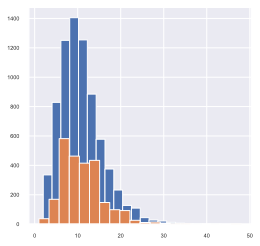

In [475]:
df_train.loc[:, 'Number of Open Accounts'].hist(figsize=(4, 4), bins=20, grid=True);
df_test.loc[:, 'Number of Open Accounts'].hist(figsize=(4, 4), bins=20, grid=True);

На схеме явно видно, что более 22-23 счетов - скорее выброс, чем нормальное явление. Его можно заменить модой. 

In [476]:
##Annual income - годовой доход

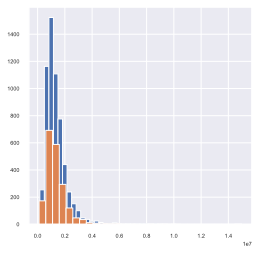

In [477]:
df_train.loc[:, 'Annual Income'].hist(figsize=(4, 4), bins=30, grid=True);
df_test.loc[:, 'Annual Income'].hist(figsize=(4, 4), bins=30, grid=True);

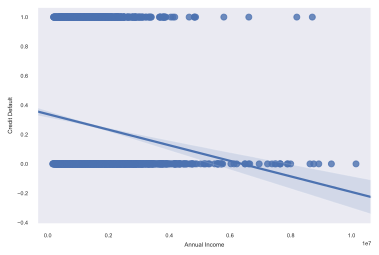

In [478]:
Annual_income_scatter_plot = pd.concat([df_train['Annual Income'], df_train['Credit Default']],axis = 1)
sns.regplot(x='Annual Income',y = 'Credit Default',data = Annual_income_scatter_plot,scatter= True, fit_reg=True)
plt.grid()

1) Как мы помним, тут много пропусков в таблице: 1557. Примерно 20% от нашей выборки и по трейну и по тесту. Будем прогнозировать этот признак. 

**Tax Liens - общее кол-во налогов к оплате**

In [479]:
df_train['Tax Liens'].value_counts()

0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
5.0       2
6.0       2
7.0       1
Name: Tax Liens, dtype: int64

In [480]:
df_test['Tax Liens'].value_counts()

0.0     2445
1.0       45
2.0        5
15.0       1
3.0        1
6.0        1
4.0        1
5.0        1
Name: Tax Liens, dtype: int64

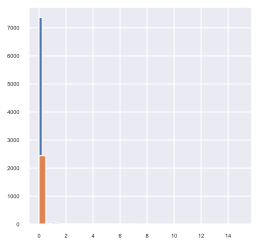

In [481]:
df_train.loc[:, 'Tax Liens'].hist(figsize=(4, 4), bins=30, grid=True);
df_test.loc[:, 'Tax Liens'].hist(figsize=(4, 4), bins=30, grid=True);

**Number of years in current job - из категориальных в количественные**

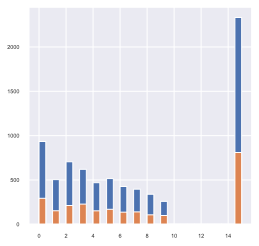

In [482]:
df_train.loc[:, 'Number of years in current job'].hist(figsize=(4, 4), bins=30, grid=True);
df_test.loc[:, 'Number of years in current job'].hist(figsize=(4, 4), bins=30, grid=True);

In [483]:
df_train['Number of years in current job'].isna().sum()

0

In [484]:
df_test['Number of years in current job'].isna().sum()

0

**Years of Credit History - сколько лет кредитной истории**

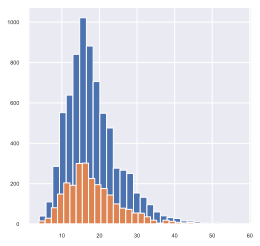

In [485]:
df_train.loc[:, 'Years of Credit History'].hist(figsize=(4, 4), bins=30, grid=True);
df_test.loc[:, 'Years of Credit History'].hist(figsize=(4, 4), bins=30, grid=True);

Пенсия в США начинается с 65 лет. С 18, допустим, можно взять кредит. Тогда значение выше 47 будет считаться как выброс. Заменим его не медианное значение. 

In [486]:
df_train.loc[df_train['Years of Credit History'] > 47, :].shape[0]

15

**Number of Credit Problems - количество проблем c кредитом**

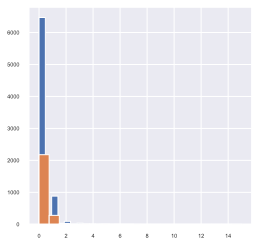

In [487]:
df_train.loc[:, 'Number of Credit Problems'].hist(figsize=(4, 4), bins=15, grid=True)
df_test.loc[:, 'Number of Credit Problems'].hist(figsize=(4, 4), bins=20, grid=True)

In [488]:
df_train['Number of Credit Problems'].value_counts()

0.0    6469
1.0     882
2.0      93
3.0      35
4.0       9
5.0       7
6.0       4
7.0       1
Name: Number of Credit Problems, dtype: int64

In [489]:
df_test['Number of Credit Problems'].value_counts()

0.0     2177
1.0      280
2.0       29
3.0        7
5.0        4
15.0       1
4.0        1
7.0        1
Name: Number of Credit Problems, dtype: int64

In [490]:
df_train.loc[df_train['Number of Credit Problems'] > 1, :].shape[0]

149

**Maximum Open Credit - наибольший открытый кредит**

Стандартное отклонение намного выше 3/4 квантиля (примерно на 3 знака). Все, что выше 3/4 квантиля + среднее значение будем считать выбросом. Заменим на медиану. 

In [491]:
df_train.loc[df_train['Maximum Open Credit'] > 1300000, :].shape[0]

684

**Bankruptcies - банкротства**

In [492]:
df_train['Bankruptcies'].unique()

array([ 1.,  0.,  3., nan,  2.,  4.])

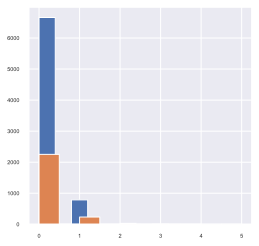

In [493]:
df_train.loc[:, 'Bankruptcies'].hist(figsize=(4, 4), bins=10, grid=True)
df_test.loc[:, 'Bankruptcies'].hist(figsize=(4, 4), bins=10, grid=True)

In [494]:
df_train['Bankruptcies'].value_counts()

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

In [495]:
df_test['Bankruptcies'].value_counts()

0.0    2252
1.0     234
2.0       5
3.0       3
5.0       2
4.0       1
Name: Bankruptcies, dtype: int64

In [496]:
df_test['Bankruptcies'].isna().sum()

3

In [497]:
df_train['Bankruptcies'].isna().sum()

14

Пропусков очень мало. Пропуски заменяем модой. 

**Months since last delinquent - количество месяцев с последней просрочки платежа**

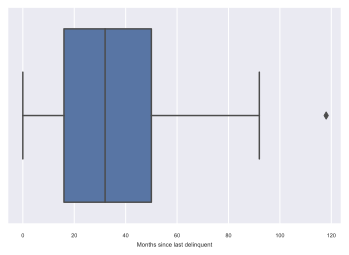

In [498]:
sns.boxplot(df_train['Months since last delinquent'])

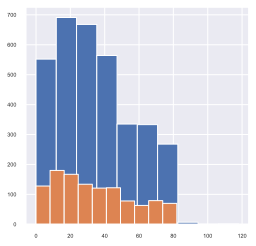

In [499]:
df_train.loc[:, 'Months since last delinquent'].hist(figsize=(4, 4), bins=10, grid=True)
df_test.loc[:, 'Months since last delinquent'].hist(figsize=(4, 4), bins=10, grid=True)

In [500]:
df_test['Months since last delinquent'].isna().sum()

1358

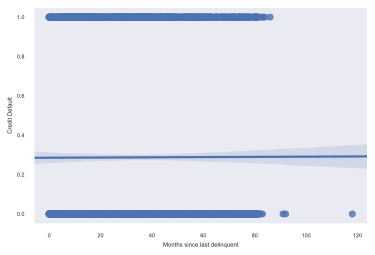

In [501]:
months_scatter_plot = pd.concat([df_train['Months since last delinquent'], df_train['Credit Default']],axis = 1)
sns.regplot(x='Months since last delinquent',y = 'Credit Default',data = months_scatter_plot,scatter= True, fit_reg=True)
plt.grid()

Очень много пропусков. Функция на графике линейная. Попробуем предсказать. 

будем считать все, что свыше 100 - выбросы. 

**Current Loan Amount - текущая сумма кредита**

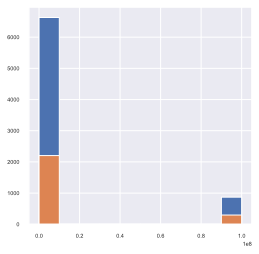

In [502]:
df_train.loc[:, 'Current Loan Amount'].hist(figsize=(4, 4), bins=10, grid=True)
df_test.loc[:, 'Current Loan Amount'].hist(figsize=(4, 4), bins=10, grid=True)

In [503]:
df_train.loc[df_train['Current Loan Amount'] == 99999999.0].shape[0]

870

In [504]:
df_train.loc[(df_train['Current Loan Amount'] == 99999999.0) & (df_train['Credit Default'] == 0)].shape[0]

870

Ну вот мы и вскрыли первый признак, что датасет был искусственно искалечан... 
Есть две гипотезы: 
 - Это максимальный платеж для заемщика. Больше заплатить не сможет. 
 - Это ошибка ввода данных. Встает вопрос чем заменить? 
 
С другой стороны, таких значений на тесте и на трейне очень много. На тесте - 870

**Monthly Debt - ежемесячный долг**

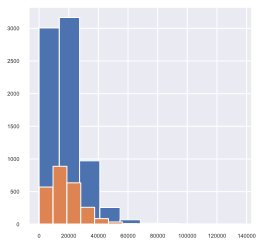

In [505]:
df_train.loc[:, 'Monthly Debt'].hist(figsize=(4, 4), bins=10, grid=True)
df_test.loc[:, 'Monthly Debt'].hist(figsize=(4, 4), bins=10, grid=True)

In [506]:
df_train.loc[df_train['Monthly Debt'] > 50000, 'Monthly Debt'].shape[0]

156

3/4 oт Annual Income = 1 700 000 usd. Следовательно, логично предположить, что платеж в 125 000 может быть. Заменим то, что свыше 50 000 тысяч на медиану. 

**Current Credit Balance - текущий кредитный баланс**

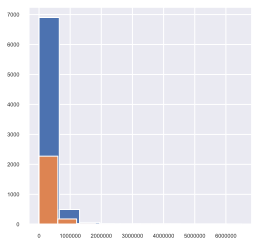

In [507]:
df_train.loc[:, 'Current Credit Balance'].hist(figsize=(4, 4), bins=10, grid=True)
df_test.loc[:, 'Current Credit Balance'].hist(figsize=(4, 4), bins=10, grid=True)

In [508]:
df_train.loc[df_train['Current Credit Balance'] > 1500000].shape[0]

74

Кредитный лимит на карте в 1 500 000 видится еще разумным. Примерно столько составляет 3/4 от Annual Income. Все, что свыше - выброс. 

**'Credit Score' Кредитный рейтинг**

Кредитный рейтинг от 300 до 850 баллов. 

Все, что ниже 300 будем считать как выброс данных. Все, что выше 850 - ошибка набора (добавление лишнего "0") - делаем целочисленное деление на 10.  

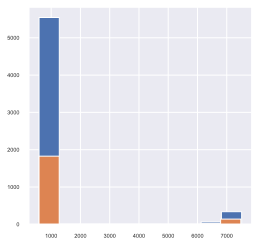

In [509]:
df_train.loc[:, 'Credit Score'].hist(figsize=(4, 4), bins=10, grid=True)
df_test.loc[:, 'Credit Score'].hist(figsize=(4, 4), bins=10, grid=True)

In [510]:
df_train['Credit Score'].isna().sum()

1557

In [511]:
df_train.loc[df_train['Credit Score'] > 850, :].shape[0]

400

Пропуски заменим на нули. Некоторые выбросы - на медиану. Про кредитный скоринг писал выше. 

In [512]:
def fillna_df(df):
    df['Credit Score'] = df['Credit Score'].fillna(0)
    df.loc[df['Credit Score'] < 300, 'Credit Score'] = 0
    df.loc[df['Credit Score'] > 850, 'Credit Score'] = df['Credit Score'] // 10
    df['Bankruptcies'] = df['Bankruptcies'].fillna(df['Bankruptcies'].mode()[0])
    df['Months since last delinquent'] = df['Months since last delinquent'].fillna(0)
    df['Years in current job'] = df['Years in current job'].fillna(0)
    df.loc[df['Number of Credit Problems'] > 1, 'Number of Credit Problems'] = 1
    df.loc[df['Term'] == 'Long Term', 'Term'] = 1
    df.loc[df['Term'] == 'Short Term', 'Term'] = 0
    df.loc[df['Bankruptcies'] > 1, 'Bankruptcies'] = 1
    return df

def clear_df(init_df, df):
    df.loc[df['Tax Liens'] > 1, 'Tax Liens'] = 1
    df.loc[df['Maximum Open Credit'] > 1300000, 'Maximum Open Credit'] = init_df['Maximum Open Credit'].median()
    df.loc[df['Months since last delinquent'] > 100, 'Months since last delinquent'] = init_df['Months since last delinquent'].median()
    df.loc[df['Number of Open Accounts'] > 23, 'Number of Open Accounts'] = init_df['Number of Open Accounts'].median()
    df.loc[df['Years of Credit History'] > 47, 'Years of Credit History'] = init_df['Years of Credit History'].median()
    df.loc[df['Current Credit Balance'] > 1250000, 'Current Credit Balance'] = init_df['Current Credit Balance'].median()
    df.loc[df['Monthly Debt'] > 50000, 'Monthly Debt'] = init_df['Monthly Debt'].median()
    return df

In [513]:
temp_train = fillna_df(dummy_train)
temp_test = fillna_df(dummy_test)

In [514]:
temp_train.head()

Home Ownership  Annual Income Years in current job  Tax Liens  \
0       Own Home       482087.0                    0        0.0   
1       Own Home      1025487.0            10+ years        0.0   
2  Home Mortgage       751412.0              8 years        0.0   
3       Own Home       805068.0              6 years        0.0   
4           Rent       776264.0              8 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   
1                     15.0                     15.3            1181730.0   
2                     11.0                     35.0            1182434.0   
3                      8.0                     22.5             147400.0   
4                     13.0                     13.6             385836.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  ...  \
0                        1.0                           0.0           1.0  ...   
1                        0.0                           0.0           0.0  ...   
2                        0.0                           0.0           0.0  ...   
3                        1.0                           0.0           1.0  ...   
4                        1.0                           0.0           0.0  ...   

  Current Loan Amount  Current Credit Balance  Monthly Debt  Credit Score  \
0          99999999.0                 47386.0        7914.0         749.0   
1            264968.0                394972.0       18373.0         737.0   
2          99999999.0                308389.0       13651.0         742.0   
3            121396.0                 95855.0       11338.0         694.0   
4            125840.0                 93309.0        7180.0         719.0   

   Credit Default  Number of years in current job  \
0               0                             0.0   
1               1                            15.0   
2               0                             8.0   
3               0                             6.0   
4               0                             8.0   

   Home Ownership_Have Mortgage  Home Ownership_Home Mortgage  \
0                             0                             0   
1                             0                             0   
2                             0                             1   
3                             0                             0   
4                             0                             0   

   Home Ownership_Own Home  Home Ownership_Rent  
0                        1                    0  
1                        1                    0  
2                        0                    0  
3                        1                    0  
4                        0                    1  

[5 rows x 22 columns]

In [515]:
temp_train_final = clear_df(dummy_train, temp_train)
temp_test_final = clear_df(dummy_test, temp_test)

In [516]:
temp_train_final.head()

Home Ownership  Annual Income Years in current job  Tax Liens  \
0       Own Home       482087.0                    0        0.0   
1       Own Home      1025487.0            10+ years        0.0   
2  Home Mortgage       751412.0              8 years        0.0   
3       Own Home       805068.0              6 years        0.0   
4           Rent       776264.0              8 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   
1                     15.0                     15.3            1181730.0   
2                     11.0                     35.0            1182434.0   
3                      8.0                     22.5             147400.0   
4                     13.0                     13.6             385836.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  ...  \
0                        1.0                           0.0           1.0  ...   
1                        0.0                           0.0           0.0  ...   
2                        0.0                           0.0           0.0  ...   
3                        1.0                           0.0           1.0  ...   
4                        1.0                           0.0           0.0  ...   

  Current Loan Amount  Current Credit Balance  Monthly Debt  Credit Score  \
0          99999999.0                 47386.0        7914.0         749.0   
1            264968.0                394972.0       18373.0         737.0   
2          99999999.0                308389.0       13651.0         742.0   
3            121396.0                 95855.0       11338.0         694.0   
4            125840.0                 93309.0        7180.0         719.0   

   Credit Default  Number of years in current job  \
0               0                             0.0   
1               1                            15.0   
2               0                             8.0   
3               0                             6.0   
4               0                             8.0   

   Home Ownership_Have Mortgage  Home Ownership_Home Mortgage  \
0                             0                             0   
1                             0                             0   
2                             0                             1   
3                             0                             0   
4                             0                             0   

   Home Ownership_Own Home  Home Ownership_Rent  
0                        1                    0  
1                        1                    0  
2                        0                    0  
3                        1                    0  
4                        0                    1  

[5 rows x 22 columns]

In [517]:
temp_test_final.head()

Home Ownership  Annual Income Years in current job  Tax Liens  \
0           Rent            NaN              4 years        0.0   
1           Rent       231838.0               1 year        0.0   
2  Home Mortgage      1152540.0              3 years        0.0   
3  Home Mortgage      1220313.0            10+ years        0.0   
4  Home Mortgage      2340952.0              6 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                      9.0                     12.5             220968.0   
1                      6.0                     32.7              55946.0   
2                     10.0                     13.7             204600.0   
3                     16.0                     17.0             456302.0   
4                     11.0                     23.6            1207272.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  ...  \
0                        0.0                          70.0           0.0  ...   
1                        0.0                           8.0           0.0  ...   
2                        0.0                           0.0           0.0  ...   
3                        0.0                          70.0           0.0  ...   
4                        0.0                           0.0           0.0  ...   

  Term  Current Loan Amount  Current Credit Balance  Monthly Debt  \
0    0             162470.0                105906.0        6813.0   
1    0              78298.0                 46037.0        2318.0   
2    0             200178.0                146490.0       18729.0   
3    0             217382.0                213199.0       27559.0   
4    1             777634.0                425391.0       42605.0   

   Credit Score  Number of years in current job  Home Ownership_Have Mortgage  \
0           0.0                             4.0                             0   
1         699.0                             1.0                             0   
2         726.0                             3.0                             0   
3         739.0                            15.0                             0   
4         706.0                             6.0                             0   

   Home Ownership_Home Mortgage  Home Ownership_Own Home  Home Ownership_Rent  
0                             0                        0                    1  
1                             0                        0                    1  
2                             1                        0                    0  
3                             1                        0                    0  
4                             1                        0                    0  

[5 rows x 21 columns]

Для удобства добавим к нашим датасетам ID номера клиентов (с 0 до 7500 и с 0 до 2500) 

In [518]:
from scipy.stats import shapiro, normaltest, ttest_rel, ttest_ind, kstest
from statsmodels.graphics.gofplots import qqplot
import numpy as np

In [519]:
ID = {'ID': np.arange(0, 7500, 1)}
ID_test = {'ID': np.arange(0, 2500, 1)}

In [520]:
ID_fin = pd.DataFrame(ID)
ID_fin_test = pd.DataFrame(ID_test)

In [521]:
temp_train_fin = pd.concat([temp_train_final, ID_fin], axis = 1)
temp_test_fin = pd.concat([temp_test_final, ID_fin_test], axis = 1)

In [522]:
temp_test_fin.tail()

Home Ownership  Annual Income Years in current job  Tax Liens  \
2495  Home Mortgage      1020053.0            10+ years        0.0   
2496  Home Mortgage            NaN              2 years        0.0   
2497  Home Mortgage      1171806.0              2 years        0.0   
2498           Rent       723520.0            10+ years        0.0   
2499           Rent      1694439.0            10+ years        0.0   

      Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
2495                     14.0                     29.1             559152.0   
2496                     15.0                     17.0             478676.0   
2497                     10.0                     12.8             478676.0   
2498                     14.0                     28.8             945780.0   
2499                     12.0                     18.4            1199748.0   

      Number of Credit Problems  Months since last delinquent  Bankruptcies  \
2495                        1.0                          68.0           1.0   
2496                        0.0                          77.0           0.0   
2497                        0.0                           0.0           0.0   
2498                        0.0                           0.0           0.0   
2499                        1.0                          72.0           0.0   

      ... Current Loan Amount  Current Credit Balance  Monthly Debt  \
2495  ...          99999999.0                162735.0       15046.0   
2496  ...            468512.0                207385.0       32996.0   
2497  ...            430496.0                676438.0       36912.0   
2498  ...            257774.0                391248.0       13506.0   
2499  ...            763004.0                559531.0       23440.0   

      Credit Score  Number of years in current job  \
2495         745.0                            15.0   
2496           0.0                             2.0   
2497         695.0                             2.0   
2498         744.0                            15.0   
2499         682.0                            15.0   

      Home Ownership_Have Mortgage  Home Ownership_Home Mortgage  \
2495                             0                             1   
2496                             0                             1   
2497                             0                             1   
2498                             0                             0   
2499                             0                             0   

      Home Ownership_Own Home  Home Ownership_Rent    ID  
2495                        0                    0  2495  
2496                        0                    0  2496  
2497                        0                    0  2497  
2498                        0                    1  2498  
2499                        0                    1  2499  

[5 rows x 22 columns]

In [523]:
temp_train_fin['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

debt consolidation, other, home improvements занимает львиную часть всего распределения. Присвоим им -1, 0, 1. Всем остальным = 2

In [524]:
def convert_purpose(df): 
    for purpose in temp_train_fin['Purpose'].unique(): 
        if purpose == 'debt consolidation':
            df.loc[df['Purpose'] == purpose, 'Classify_purpose'] = -1
        elif purpose == 'other':
            df.loc[df['Purpose'] == purpose, 'Classify_purpose'] = 0 
        elif purpose == 'home improvements':
            df.loc[df['Purpose'] == purpose, 'Classify_purpose'] = 1 
        else:
            df.loc[df['Purpose'] == purpose, 'Classify_purpose'] = 2
    return df

In [525]:
fin_df_train = convert_purpose(temp_train_fin)
fin_df_test = convert_purpose(temp_test_fin)

In [526]:
fin_df_test.tail()

Home Ownership  Annual Income Years in current job  Tax Liens  \
2495  Home Mortgage      1020053.0            10+ years        0.0   
2496  Home Mortgage            NaN              2 years        0.0   
2497  Home Mortgage      1171806.0              2 years        0.0   
2498           Rent       723520.0            10+ years        0.0   
2499           Rent      1694439.0            10+ years        0.0   

      Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
2495                     14.0                     29.1             559152.0   
2496                     15.0                     17.0             478676.0   
2497                     10.0                     12.8             478676.0   
2498                     14.0                     28.8             945780.0   
2499                     12.0                     18.4            1199748.0   

      Number of Credit Problems  Months since last delinquent  Bankruptcies  \
2495                        1.0                          68.0           1.0   
2496                        0.0                          77.0           0.0   
2497                        0.0                           0.0           0.0   
2498                        0.0                           0.0           0.0   
2499                        1.0                          72.0           0.0   

      ... Current Credit Balance  Monthly Debt  Credit Score  \
2495  ...               162735.0       15046.0         745.0   
2496  ...               207385.0       32996.0           0.0   
2497  ...               676438.0       36912.0         695.0   
2498  ...               391248.0       13506.0         744.0   
2499  ...               559531.0       23440.0         682.0   

      Number of years in current job  Home Ownership_Have Mortgage  \
2495                            15.0                             0   
2496                             2.0                             0   
2497                             2.0                             0   
2498                            15.0                             0   
2499                            15.0                             0   

      Home Ownership_Home Mortgage  Home Ownership_Own Home  \
2495                             1                        0   
2496                             1                        0   
2497                             1                        0   
2498                             0                        0   
2499                             0                        0   

      Home Ownership_Rent    ID  Classify_purpose  
2495                    0  2495              -1.0  
2496                    0  2496              -1.0  
2497                    0  2497              -1.0  
2498                    1  2498              -1.0  
2499                    1  2499              -1.0  

[5 rows x 23 columns]

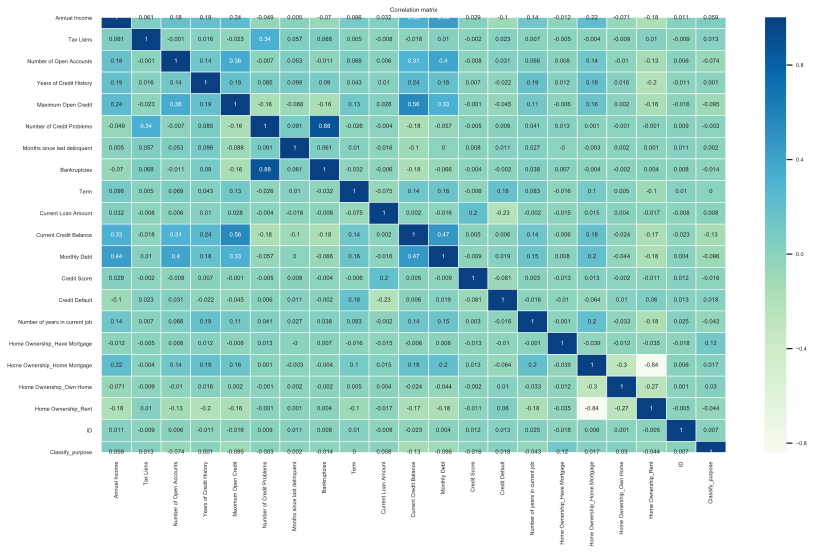

In [527]:
plt.figure(figsize = (14,8))

sns.set(font_scale=0.5)
sns.heatmap(fin_df_train.corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

In [528]:
from sklearn.decomposition import PCA 

In [529]:
pca = PCA(n_components=1)
X = pca.fit_transform(fin_df_train.loc[:,["Home Ownership_Have Mortgage", "Home Ownership_Home Mortgage", "Home Ownership_Own Home", 
                                         "Home Ownership_Rent"]].values)

In [530]:
X_ = pca.fit_transform(fin_df_test.loc[:,["Home Ownership_Have Mortgage", "Home Ownership_Home Mortgage", "Home Ownership_Own Home", 
                                         "Home Ownership_Rent"]].values)

In [531]:
fin_df_train["PCA_home"] = X

In [532]:
fin_df_test["PCA_home"] = X_

In [533]:
check_missing_values(fin_df_train)

столбец 'Annual Income' -  пропусков в столбце: 1557


In [534]:
check_missing_values(fin_df_test)

столбец 'Annual Income' -  пропусков в столбце: 513


**Прогнозирование переменной Annual Income**

In [535]:
fin_df_train['Annual Income'].values

array([ 482087., 1025487.,  751412., ..., 1878910.,      nan,      nan])

In [536]:
def input_variance(df, new_var, col, variance):
    
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_absolute_error
    from sklearn.preprocessing import StandardScaler

    rrf = RandomForestRegressor()
    sclx = StandardScaler()
    scly = StandardScaler()
    
    df[new_var] = df[variance].values
    
    if variance in col:
        col.remove(variance)
    
    X_train_test_predict = df[col].iloc[:,:]
    y_train_test_predict = df[new_var].iloc[:]
    
    index_nan = np.where(y_train_test_predict.isna()==True)[0]
    X_predict= X_train_test_predict.iloc[index_nan,:]
    
    index_test_train = np.where(y_train_test_predict.isna() == False)[0]
    X_train_test = X_train_test_predict.iloc[index_test_train,:]
    y_train_test = y_train_test_predict.iloc[index_test_train]
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, test_size=0.2)
    
    sclx.fit(X_train)
    scly.fit(y_train.values.reshape((-1,1)))
    rrf.fit(sclx.transform(X_train), scly.transform(y_train.values.reshape((-1,1))))
    
    y_val = scly.inverse_transform(rrf.predict(sclx.transform(X_test)))
    print(mean_absolute_error(y_val,y_test))
    
    df[new_var].values[index_nan]=scly.inverse_transform(rrf.predict(sclx.transform(X_predict)))

    return df[new_var]

In [537]:
test_col = ['Tax Liens', 'Number of Open Accounts', 'Years of Credit History', 'Maximum Open Credit',
       'Number of Credit Problems', 'Months since last delinquent', 'Bankruptcies', 'Term', 'Current Loan Amount',
       'Current Credit Balance', 'Monthly Debt', 'Number of years in current job',
       'ID', 'Classify_purpose', 'PCA_home', 'Credit Score']

target_col = ['Credit Default']

train_col = test_col + target_col

In [538]:
fin_df_train['new_income'] = input_variance(df = fin_df_train, new_var='new_income', col = train_col, 
                                            variance = 'Annual Income')

435642.45223717403


In [539]:
fin_df_test['new_income'] = input_variance(df = fin_df_test, new_var='new_income', col = test_col, 
                                           variance = 'Annual Income')

467486.31489949755


In [540]:
inc_test_new = fin_df_test['new_income']
inc_train_new = fin_df_train['new_income']

In [541]:
fin_df_train.head()

Home Ownership  Annual Income Years in current job  Tax Liens  \
0       Own Home       482087.0                    0        0.0   
1       Own Home      1025487.0            10+ years        0.0   
2  Home Mortgage       751412.0              8 years        0.0   
3       Own Home       805068.0              6 years        0.0   
4           Rent       776264.0              8 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   
1                     15.0                     15.3            1181730.0   
2                     11.0                     35.0            1182434.0   
3                      8.0                     22.5             147400.0   
4                     13.0                     13.6             385836.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  ...  \
0                        1.0                           0.0           1.0  ...   
1                        0.0                           0.0           0.0  ...   
2                        0.0                           0.0           0.0  ...   
3                        1.0                           0.0           1.0  ...   
4                        1.0                           0.0           0.0  ...   

  Credit Default  Number of years in current job  \
0              0                             0.0   
1              1                            15.0   
2              0                             8.0   
3              0                             6.0   
4              0                             8.0   

   Home Ownership_Have Mortgage  Home Ownership_Home Mortgage  \
0                             0                             0   
1                             0                             0   
2                             0                             1   
3                             0                             0   
4                             0                             0   

   Home Ownership_Own Home  Home Ownership_Rent  ID  Classify_purpose  \
0                        1                    0   0              -1.0   
1                        1                    0   1              -1.0   
2                        0                    0   2              -1.0   
3                        1                    0   3              -1.0   
4                        0                    1   4              -1.0   

   PCA_home  new_income  
0  0.055261    482087.0  
1  0.055261   1025487.0  
2 -0.667601    751412.0  
3  0.055261    805068.0  
4  0.746495    776264.0  

[5 rows x 26 columns]

In [542]:
fin_df_test.head()

Home Ownership  Annual Income Years in current job  Tax Liens  \
0           Rent            NaN              4 years        0.0   
1           Rent       231838.0               1 year        0.0   
2  Home Mortgage      1152540.0              3 years        0.0   
3  Home Mortgage      1220313.0            10+ years        0.0   
4  Home Mortgage      2340952.0              6 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                      9.0                     12.5             220968.0   
1                      6.0                     32.7              55946.0   
2                     10.0                     13.7             204600.0   
3                     16.0                     17.0             456302.0   
4                     11.0                     23.6            1207272.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  ...  \
0                        0.0                          70.0           0.0  ...   
1                        0.0                           8.0           0.0  ...   
2                        0.0                           0.0           0.0  ...   
3                        0.0                          70.0           0.0  ...   
4                        0.0                           0.0           0.0  ...   

  Credit Score  Number of years in current job  Home Ownership_Have Mortgage  \
0          0.0                             4.0                             0   
1        699.0                             1.0                             0   
2        726.0                             3.0                             0   
3        739.0                            15.0                             0   
4        706.0                             6.0                             0   

   Home Ownership_Home Mortgage  Home Ownership_Own Home  Home Ownership_Rent  \
0                             0                        0                    1   
1                             0                        0                    1   
2                             1                        0                    0   
3                             1                        0                    0   
4                             1                        0                    0   

   ID  Classify_purpose  PCA_home  new_income  
0   0              -1.0  0.762090  1206477.96  
1   1               2.0  0.762090   231838.00  
2   2              -1.0 -0.651755  1152540.00  
3   3              -1.0 -0.651755  1220313.00  
4   4              -1.0 -0.651755  2340952.00  

[5 rows x 25 columns]

In [543]:
fin_df_train.columns

Index(['Home Ownership', 'Annual Income', 'Years in current job', 'Tax Liens',
       'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems',
       'Months since last delinquent', 'Bankruptcies', 'Purpose', 'Term',
       'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt',
       'Credit Score', 'Credit Default', 'Number of years in current job',
       'Home Ownership_Have Mortgage', 'Home Ownership_Home Mortgage',
       'Home Ownership_Own Home', 'Home Ownership_Rent', 'ID',
       'Classify_purpose', 'PCA_home', 'new_income'],
      dtype='object')

In [544]:
cont_cols = ['Tax Liens', 'Number of Open Accounts', 'Maximum Open Credit', 'new_income',
       'Number of Credit Problems', 'Months since last delinquent', 'Bankruptcies', 'Term', 'Current Loan Amount',
       'Current Credit Balance', 'Monthly Debt', 'Number of years in current job',
     'Classify_purpose', 'PCA_home', 'Credit Score', 'Credit Default']

TARGET = ['Credit Default']

В полученном датасете "fin_df_train\test" не осталось категориальных переменных. Мы применили PCA преобразование к Home Ownership, Term превратился в бинарный признак, years in current job - в числовой. 

Столбец Annual Income можно удалить и вместо него оставить new_income. 

Есть смысл рассмотреть распределения переменных и изменить через преобразование boxcox, если это необходимо. Также нужно поработать с библиотекой imblearn. 

**Корреляция с базовыми признаками**

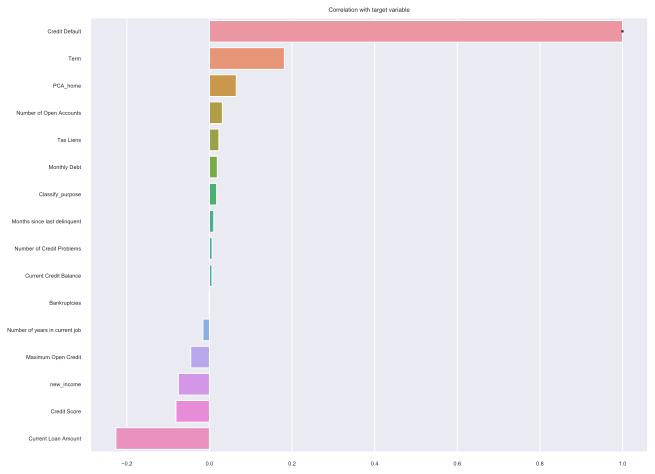

In [545]:
corr_with_target = fin_df_train[cont_cols + TARGET].corr().iloc[:,-1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

Есть смысл рассмотреть более детально те признаки, чья зависимость от базовой переменной выражена явно. 

In [546]:
from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import zconfint

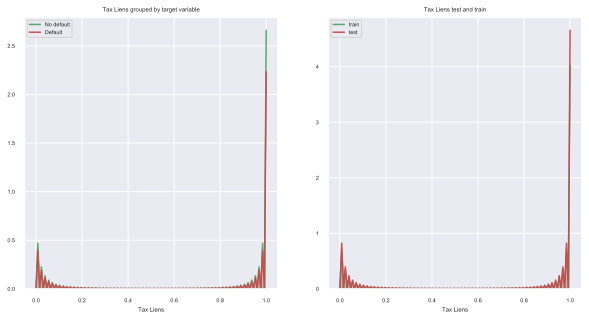

(0.11529791355133057, 0.0)


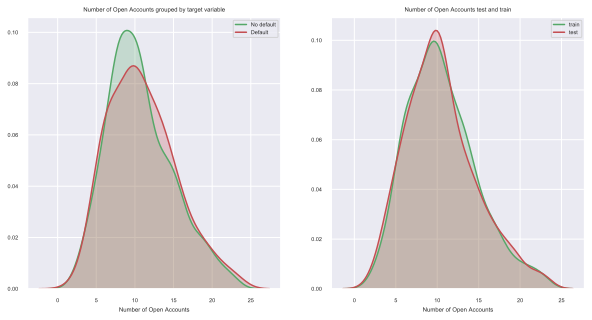

(0.9688570499420166, 8.285616658922079e-14)


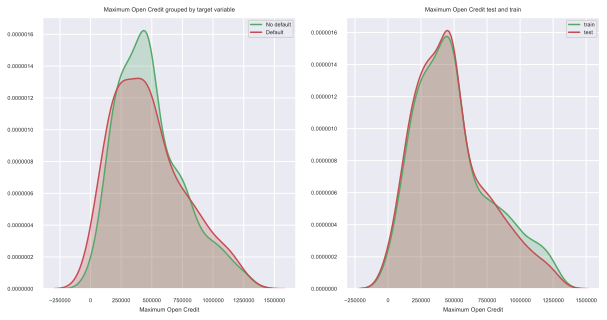

(0.9453115463256836, 9.070732316310024e-19)


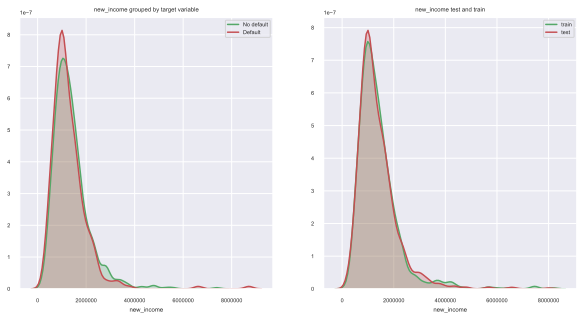

(0.7572524547576904, 6.241763078355404e-36)


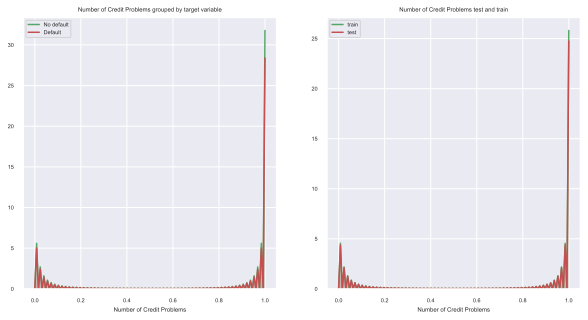

(0.3822516202926636, 0.0)


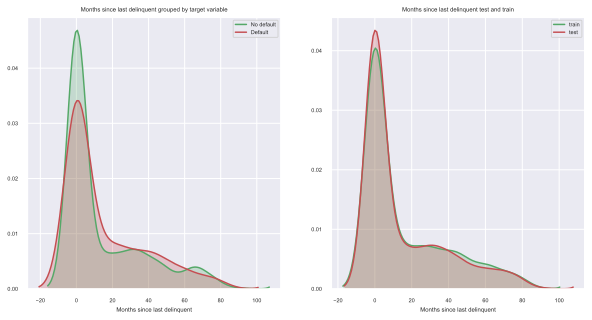

(0.7347040176391602, 3.86437759065012e-37)


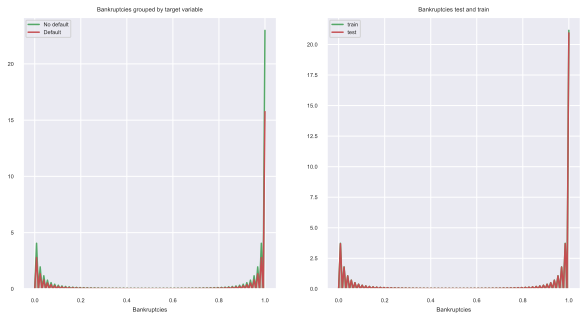

(0.34209680557250977, 0.0)


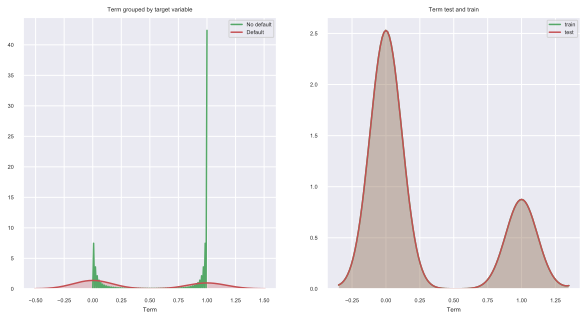

(0.5443402528762817, 5.605193857299268e-45)


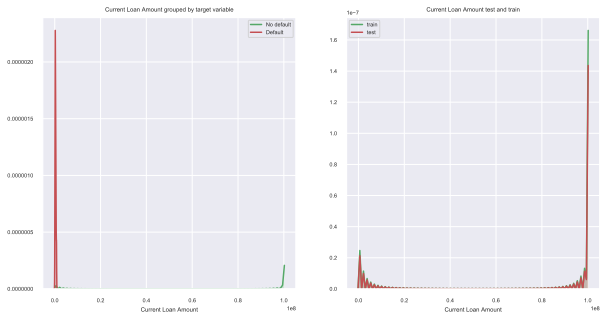

(0.38173097372055054, 0.0)


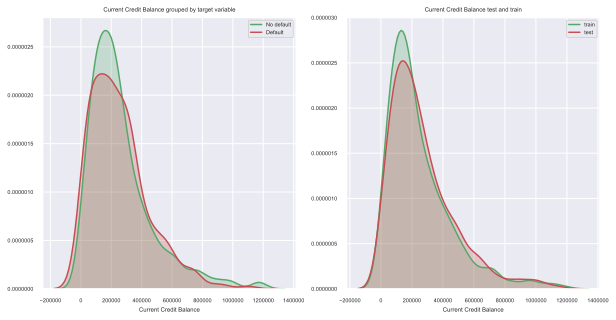

(0.8538002967834473, 1.962009984946177e-29)


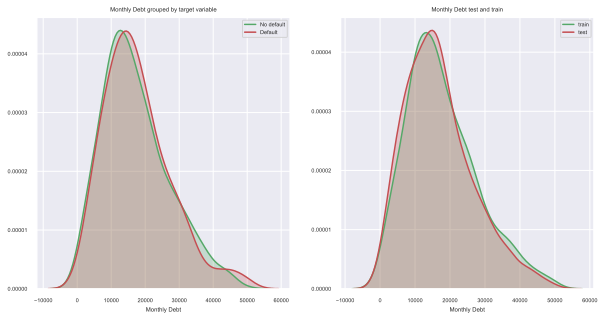

(0.9587482213973999, 3.5138740947348983e-16)


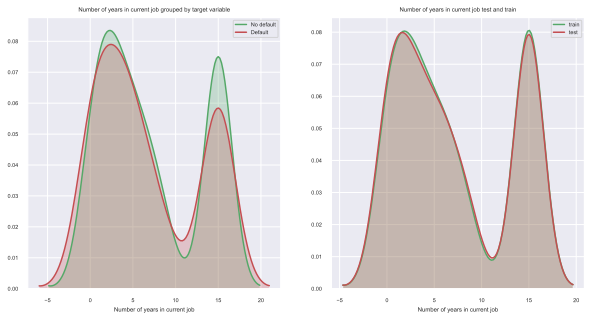

(0.8272804617881775, 1.7047892467927474e-31)


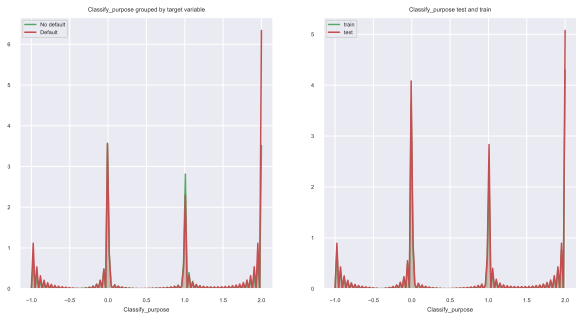

(0.5092390775680542, 0.0)


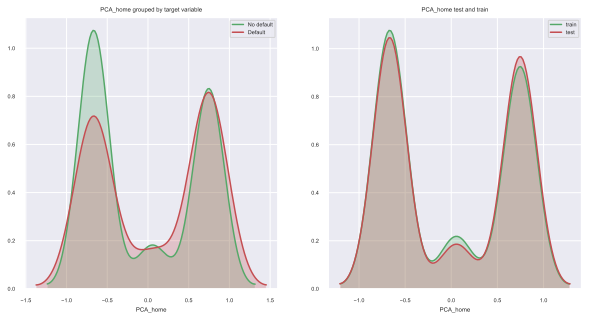

(0.6936418414115906, 3.848000615497556e-39)


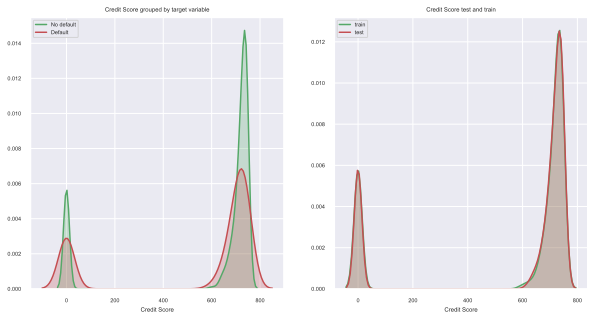

(0.5699440240859985, 4.484155085839415e-44)


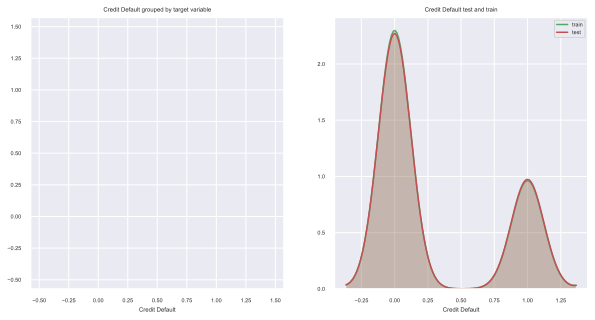

(0.5723612308502197, 5.465064010866787e-44)


In [547]:
for col in cont_cols:
    plt.figure(figsize=(10, 5))
    limit_bal_with_target_s = fin_df_train[[col,'Credit Default' ]].sample(1000)
    limit_bal_s = limit_bal_with_target_s[col]
    limit_bal_target_0 = limit_bal_s[limit_bal_with_target_s['Credit Default'] == 0]
    limit_bal_target_1 = limit_bal_s[limit_bal_with_target_s['Credit Default'] == 1]

    
    plt.subplot(1,2,1)
    sns.kdeplot(limit_bal_target_0, shade=True, label='No default', color='g')
    sns.kdeplot(limit_bal_target_1, shade=True, label='Default', color='r')
    
    plt.xlabel(col)
    plt.title(col+' grouped by target variable')
    
    limit_bal_s = fin_df_train[col ].sample(1000)
    limit_bal_st = fin_df_train[col ].sample(1000)

    
    plt.subplot(1,2,2)
    sns.kdeplot(limit_bal_s, shade=True, label='train', color='g')
    sns.kdeplot(limit_bal_st, shade=True, label='test', color='r')
    
    plt.xlabel(col)
    plt.title(col+' test and train')
    
    plt.show()
    print(shapiro(limit_bal_s))

Отдельно еще раз оценим "new_income"

In [548]:
from scipy.stats  import boxcox

In [549]:
cols_for_boxcox = cont_cols = ['Number of Open Accounts', 'Maximum Open Credit', 'new_income',
       'Current Credit Balance', 'Monthly Debt']

0.4407484076610565


((array([-3.73889526, -3.50968086, -3.3836472 , ...,  3.3836472 ,
          3.50968086,  3.73889526]),
  array([ 8.4235602 ,  8.4544973 ,  8.45821582, ..., 10.07913454,
         10.09568651, 10.12586556])),
 (0.2037910723646683, 9.297660333046851, 0.9970416541381822))

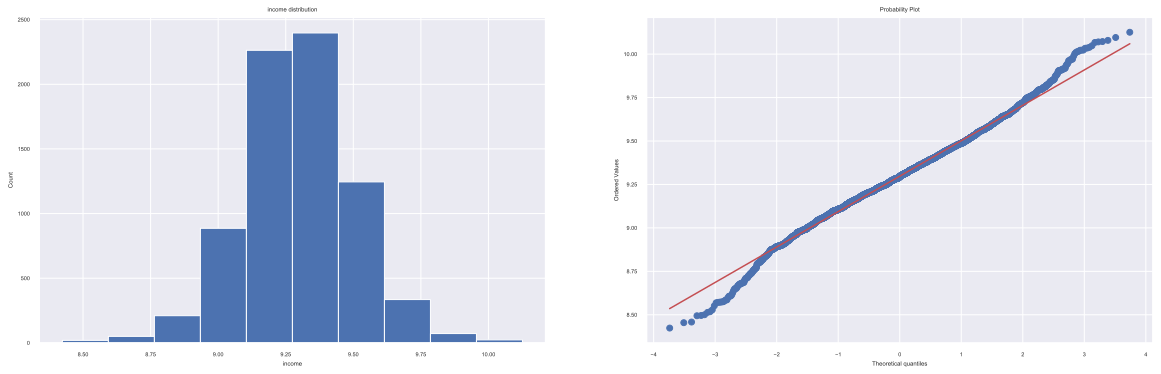

In [550]:
from scipy.stats import boxcox
inc_train_new, lmbda = boxcox(fin_df_train['new_income'])
print(param)
plt.figure(figsize=(20, 6))

ax1 = plt.subplot(121)
ax1.set_xlabel('income')
ax1.set_ylabel('Count')
ax1.set_title('income distribution')
plt.hist(inc_train_new)

plt.subplot(122)
probplot(inc_train_new, dist='norm', plot=plt)

0.4407484076610565


((array([-3.73889526, -3.50968086, -3.3836472 , ...,  3.3836472 ,
          3.50968086,  3.73889526]),
  array([0.81068531, 0.81068531, 0.81068531, ..., 6.76738993, 6.76738993,
         6.76738993])),
 (1.1268479294865372, 4.065160554416448, 0.9959452093490028))

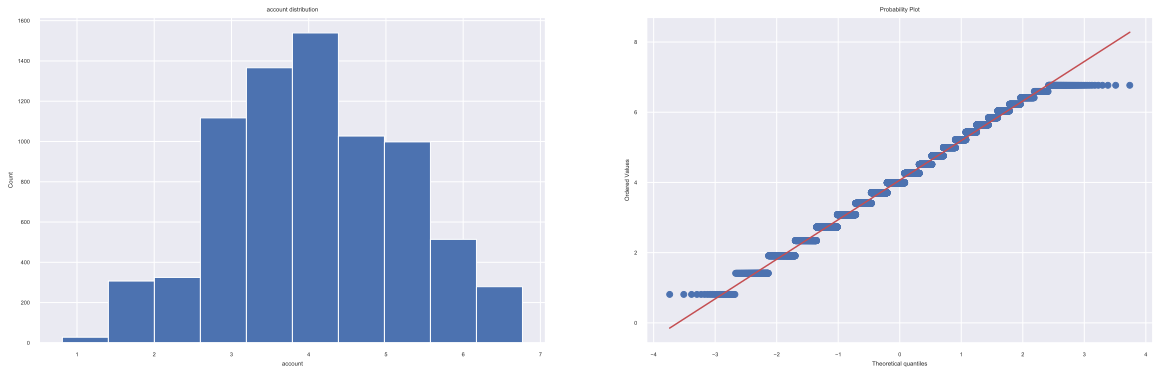

In [551]:
from scipy.stats import boxcox
acc_train_new, lmbda = boxcox(fin_df_train['Number of Open Accounts'])
print(param)
plt.figure(figsize=(20, 6))

ax1 = plt.subplot(121)
ax1.set_xlabel('account')
ax1.set_ylabel('Count')
ax1.set_title('account distribution')
plt.hist(acc_train_new)

plt.subplot(122)
probplot(acc_train_new, dist='norm', plot=plt)

In [552]:
shapiro(inc_train_new)

(0.994162917137146, 5.949680520755883e-17)

In [553]:
shapiro(acc_train_new)

(0.9916830062866211, 1.4250342860049648e-20)

Лучше всего boxcox преобразование показало себя при работе с признаками "new_income", "Number of Open Accounts". Будем иметь это ввиду при тестировании нашей модели. Пока добавлять их не будем, поскольку p-value на тесте Шапиро-Уилка оказалось много меньше 0.05. 

In [554]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\anatoly\anaconda3\lib\site-packages (0.7.0)


# Балансировка и масштабирование моделей

In [555]:
import pandas as pd
import numpy as np
import pickle

from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
import xgboost as xgb
import catboost as catb

from sklearn.preprocessing import StandardScaler

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [556]:
cont_cols = ['Tax Liens', 'Number of Open Accounts', 'Maximum Open Credit', 'new_income',
       'Number of Credit Problems', 'Months since last delinquent', 'Bankruptcies', 'Current Loan Amount',
       'Current Credit Balance', 'Monthly Debt', 'Number of years in current job',
       'PCA_home', 'Credit Score']

cat_cols = ['Classify_purpose', 'Term']

TARGET = 'Credit Default'

SELECTED_FEATURE_NAMES = cont_cols + cat_cols

In [557]:
def norm_df(df_train, df_test):
    scaler = StandardScaler()
    df_train[cont_cols] = scaler.fit_transform(df_train[cont_cols])
    df_test[cont_cols] = scaler.transform(df_test[cont_cols])
    return df_train, df_test

In [558]:
fin_train, fin_test = norm_df(fin_df_train[cont_cols], fin_df_test[cont_cols])

In [559]:
fin_train = pd.concat([fin_train[cont_cols], fin_df_train[cat_cols]], axis=1)
fin_test = pd.concat([fin_test[cont_cols], fin_df_test[cat_cols]], axis=1)

In [561]:
from sklearn.model_selection import train_test_split

X = fin_train[SELECTED_FEATURE_NAMES]
y = fin_df_train['Credit Default']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=42)

In [569]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=150)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train.values.ravel())

from collections import Counter
print(sorted(Counter(y_resampled).items()))

y_train = pd.DataFrame(y_resampled, columns=[TARGET])

X_train = pd.DataFrame(X_resampled, columns=SELECTED_FEATURE_NAMES)

[(0, 3795), (1, 3795)]


# Создание  и тюнинг моделей

In [579]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [594]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42, max_features=3, min_samples_leaf=2)
model_rf.fit(X_train, y_train)

y_train_pred = model_rf.predict(X_train)
y_test_pred = model_rf.predict(X_valid)

get_classification_report(y_train, y_train_pred, y_valid, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.68      0.58      0.63      3795
           1       0.64      0.73      0.68      3795

    accuracy                           0.65      7590
   macro avg       0.66      0.65      0.65      7590
weighted avg       0.66      0.65      0.65      7590

TEST

              precision    recall  f1-score   support

           0       0.82      0.56      0.67      1592
           1       0.40      0.70      0.51       658

    accuracy                           0.60      2250
   macro avg       0.61      0.63      0.59      2250
weighted avg       0.70      0.60      0.62      2250

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               899  693
1               200  458


In [587]:
import xgboost as xgb

In [588]:
model_xgb = xgb.XGBClassifier(random_state=21)
model_xgb.fit(X_train, y_train)

y_train_pred = model_xgb.predict(X_train)
y_test_pred = model_xgb.predict(X_valid)

get_classification_report(y_train, y_train_pred, y_valid, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3795
           1       0.97      0.98      0.98      3795

    accuracy                           0.98      7590
   macro avg       0.98      0.98      0.98      7590
weighted avg       0.98      0.98      0.98      7590

TEST

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1592
           1       0.42      0.40      0.41       658

    accuracy                           0.66      2250
   macro avg       0.59      0.59      0.59      2250
weighted avg       0.66      0.66      0.66      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1236  356
1                398  260


In [590]:
import catboost as catb

In [593]:
cb_model = catb.CatBoostClassifier(silent=True, random_state=21)
cb_model.fit(X_train, y_train)

y_train_pred = cb_model.predict(X_train)
y_test_pred = cb_model.predict(X_valid)
y_test_pred_probs = cb_model.predict_proba(X_valid)

get_classification_report(y_train, y_train_pred, y_valid, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      3795
           1       0.88      0.94      0.91      3795

    accuracy                           0.90      7590
   macro avg       0.91      0.90      0.90      7590
weighted avg       0.91      0.90      0.90      7590

TEST

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1592
           1       0.44      0.52      0.47       658

    accuracy                           0.66      2250
   macro avg       0.61      0.62      0.61      2250
weighted avg       0.68      0.66      0.67      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1148  444
1                315  343


In [595]:
def show_proba_calibration_plots(y_predicted_probs, y_true_labels):
    preds_with_true_labels = np.array(list(zip(y_predicted_probs, y_true_labels)))

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in np.linspace(0.1, 0.9, 9):
        thresholds.append(threshold)
        precisions.append(precision_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        recalls.append(recall_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        f1_scores.append(f1_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))

    scores_table = pd.DataFrame({'f1':f1_scores,
                                 'precision':precisions,
                                 'recall':recalls,
                                 'probability':thresholds}).sort_values('f1', ascending=False).round(3)
  
    figure = plt.figure(figsize = (15, 5))

    plt1 = figure.add_subplot(121)
    plt1.plot(thresholds, precisions, label='Precision', linewidth=4)
    plt1.plot(thresholds, recalls, label='Recall', linewidth=4)
    plt1.plot(thresholds, f1_scores, label='F1', linewidth=4)
    plt1.set_ylabel('Scores')
    plt1.set_xlabel('Probability threshold')
    plt1.set_title('Probabilities threshold calibration')
    plt1.legend(bbox_to_anchor=(0.25, 0.25))   
    plt1.table(cellText = scores_table.values,
               colLabels = scores_table.columns, 
               colLoc = 'center', cellLoc = 'center', loc = 'bottom', bbox = [0, -1.3, 1, 1])

    plt2 = figure.add_subplot(122)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 0][:, 0], 
              label='Another class', color='royalblue', alpha=1)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 1][:, 0], 
              label='Main class', color='darkcyan', alpha=0.8)
    plt2.set_ylabel('Number of examples')
    plt2.set_xlabel('Probabilities')
    plt2.set_title('Probability histogram')
    plt2.legend(bbox_to_anchor=(1, 1))

    plt.show()

In [596]:
def show_learning_curve_plot(estimator, X, y, cv=3, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, 
                                                            cv=cv, 
                                                            scoring='f1',
                                                            train_sizes=train_sizes, 
                                                            n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(15,8))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.title(f"Learning curves ({type(estimator).__name__})")
    plt.xlabel("Training examples")
    plt.ylabel("Score")     
    plt.legend(loc="best")
    plt.grid()
    plt.show()

In [597]:
def show_feature_importances(feature_names, feature_importances, get_top=None):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
       
    plt.figure(figsize = (20, len(feature_importances) * 0.355))
    
    sns.barplot(feature_importances['importance'], feature_importances['feature'])
    
    plt.xlabel('Importance')
    plt.title('Importance of features')
    plt.show()
    
    if get_top is not None:
        return feature_importances['feature'][:get_top].tolist()

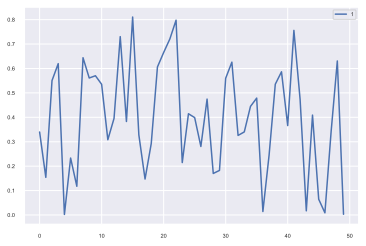

In [601]:
N=50
plt.plot(y_test_pred_probs[:N,1],label='1')
#plt.plot(y_test_pred_probs[:N,0],label='0')
plt.legend()
plt.show()

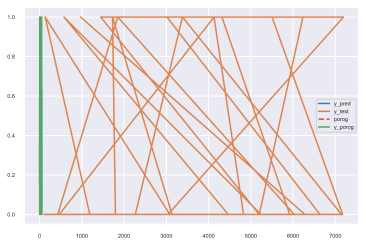

TRAIN

              precision    recall  f1-score   support

           0       0.68      0.58      0.63      3795
           1       0.64      0.73      0.68      3795

    accuracy                           0.65      7590
   macro avg       0.66      0.65      0.65      7590
weighted avg       0.66      0.65      0.65      7590

TEST

              precision    recall  f1-score   support

           0       0.84      0.49      0.62      1592
           1       0.39      0.77      0.51       658

    accuracy                           0.57      2250
   macro avg       0.61      0.63      0.57      2250
weighted avg       0.71      0.57      0.59      2250

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               783  809
1               151  507


In [606]:
N=50
porog=0.35
y_p = (y_test_pred_probs[:,1]>porog).astype(int)

plt.plot(y_test_pred_probs[:N,1], label='y_pred')

plt.plot(y_valid[:N], label='y_test')
plt.plot([0,N],[porog, porog], '--r',label='porog')
plt.plot(y_p[:N], label='y_porog')
plt.legend()
plt.show()
get_classification_report(y_train, y_train_pred, y_valid, y_p)

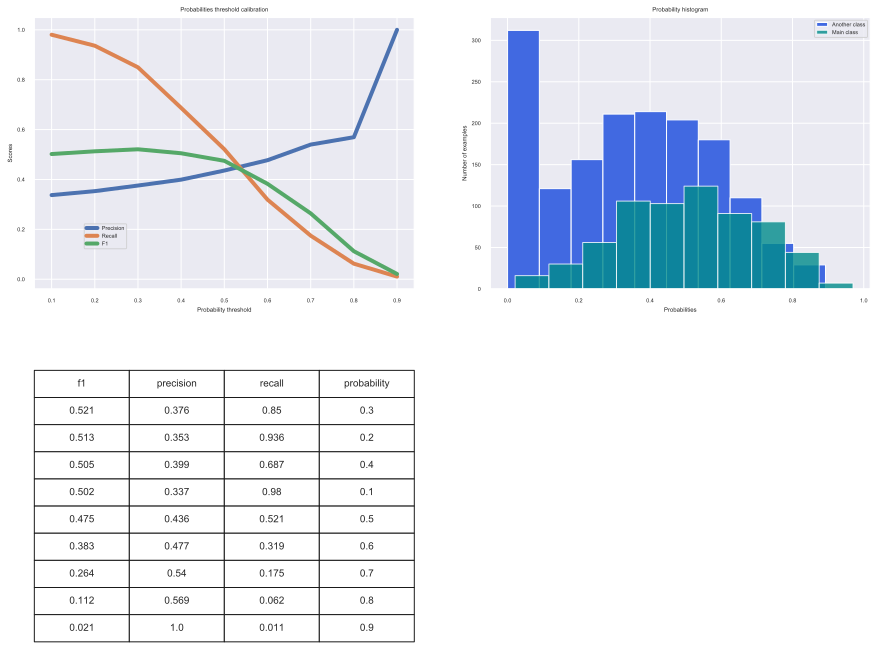

In [607]:
show_proba_calibration_plots(y_test_pred_probs[:, 1], y_valid)

In [623]:
from sklearn.model_selection import RandomizedSearchCV
rf_cv = RandomForestClassifier(n_estimators=300, random_state=42, min_samples_leaf=2)
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rf_cv, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train, y_train.values.ravel())
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.1min finished


{'n_estimators': 700,
 'min_samples_split': 12,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 13,
 'bootstrap': False}

In [624]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                700                      12                      2   
1                600                      23                      2   
2                400                      23                      2   
3                700                      23                      7   
4                700                       2                      2   
5                100                       2                     18   
6                300                      28                      7   
7                500                      12                     18   
8                800                      28                     12   
9                300                       2                     23   

  param_max_features param_max_depth param_bootstrap  mean_test_score  \
0               sqrt              13           False         0.821344   
1               sqrt              15           False         0.818577   
2               sqrt              14           False         0.813175   
3               log2              15           False         0.808564   
4               log2              11            True         0.789328   
5               sqrt              15           False         0.764690   
6               log2              13            True         0.763373   
7               sqrt              13           False         0.761528   
8               sqrt              14            True         0.754282   
9               log2              14           False         0.748880   

   rank_test_score  
0                1  
1                2  
2                3  
3                4  
4                5  
5                6  
6                7  
7                8  
8                9  
9               10

Сделаем модель по максимально лучшим настроенным параметрам 

In [627]:
from sklearn.ensemble import RandomForestClassifier
model_rf_alt = RandomForestClassifier(n_estimators=700, max_depth=13, 
                                  random_state=42, 
                                  max_features='sqrt', 
                                  min_samples_split = 12,
                                  min_samples_leaf=2)
model_rf_alt.fit(X_train, y_train)

y_train_pred = model_rf_alt.predict(X_train)
y_test_pred = model_rf_alt.predict(X_valid)

get_classification_report(y_train, y_train_pred, y_valid, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      3795
           1       0.90      0.96      0.93      3795

    accuracy                           0.93      7590
   macro avg       0.93      0.93      0.93      7590
weighted avg       0.93      0.93      0.93      7590

TEST

              precision    recall  f1-score   support

           0       0.77      0.74      0.76      1592
           1       0.43      0.47      0.45       658

    accuracy                           0.66      2250
   macro avg       0.60      0.61      0.60      2250
weighted avg       0.67      0.66      0.67      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1181  411
1                346  312


Оставляем финальную модель: 

In [628]:
from sklearn.ensemble import RandomForestClassifier
model_rf_fin = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42, max_features=3, min_samples_leaf=2)
model_rf_fin.fit(X_train, y_train)

y_train_pred = model_rf_fin.predict(X_train)
y_test_pred = model_rf_fin.predict(X_valid)

get_classification_report(y_train, y_train_pred, y_valid, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.68      0.58      0.63      3795
           1       0.64      0.73      0.68      3795

    accuracy                           0.65      7590
   macro avg       0.66      0.65      0.65      7590
weighted avg       0.66      0.65      0.65      7590

TEST

              precision    recall  f1-score   support

           0       0.82      0.56      0.67      1592
           1       0.40      0.70      0.51       658

    accuracy                           0.60      2250
   macro avg       0.61      0.63      0.59      2250
weighted avg       0.70      0.60      0.62      2250

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               899  693
1               200  458


In [629]:
def create_model_test(df_train, df_test, y_train, model, feats):
    model.fit(df_train.loc[:, feats], y_train.values.ravel())
    pred_valid = model.predict(df_test.loc[:, feats])
    return (pred_valid)

In [631]:
fin_test['Credit Default'] = create_model_test(X_train, fin_test, y_train, model_rf_fin, SELECTED_FEATURE_NAMES)

In [632]:
fin_test['Credit Default'] 

0       1
1       1
2       0
3       0
4       1
       ..
2495    0
2496    1
2497    1
2498    0
2499    1
Name: Credit Default, Length: 2500, dtype: int64

In [637]:
fin_test['Id'] = pd.DataFrame(np.arange(0, 2500))

In [636]:
fin_test['Id']

0          0
1          1
2          2
3          3
4          4
        ... 
2495    2495
2496    2496
2497    2497
2498    2498
2499    2499
Name: Id, Length: 2500, dtype: int32

In [638]:
fin_test.loc[:, ['Id','Credit Default']].to_csv('ALyutov_predictions.csv', index=None)

Ответы на вопросы: 

1:

В семье моделей на основе деревьев принятия решений одно дерево способно выучить все данные. Это приводит к сильному переобучению. Поэтому стратегии регуляризации для них встроены в большинство популярных пакетов. Эти стратегии часто заключаются в ограничении определенных параметров дерева:

Глубина дерева — параметр, который ограничивает максимальный рост дерева (деревья принятия решений растут в глубину). Этот параметр позволяет уменьшить переобучение, но ограничивает количество переменных для каждого конкретного листа.


Минимальный вес листа — параметр, который ограничивает рост дерева, когда следующее деление листа приводит к тому, что хотя бы в одном из них слишком мало наблюдений, что делало бы его слишком специфичным.
Также для регрессионных деревьев можно настраивать коэффициенты для линейной регуляризации, которые используются в их листах.

2: 

feature_importances усредняется по всем оценщикам (всем DecisionTreeClassifer's) атрибутов в ансамбле.